                                          NETFLIX CASE STUDY

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df.shape

(8807, 12)

In [7]:
#removing the leading and trailing spaces and converting the 'date_added' column to datetime
df['date_added'] = df['date_added'].astype(str).str.lstrip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [8]:
df.loc[df['title'].str.contains('Louis C.K.', na=False), 'rating'] =np.nan
df.loc[df['title'].str.contains('Louis C.K. 2017', na=False),'duration'] = '74 min'
df.loc[df['title'].str.contains('Louis C.K.: Hilarious', na=False),'duration'] = '84 min'
df.loc[df['title'].str.contains('Louis C.K.: Live at the ComedyStore', na=False), 'duration'] = '66 min'

In [13]:
#checing the missing values
missing_values=df.isna().sum()
missing_values[missing_values>0]

,0
director,2634
cast,825
country,831
date_added,10
rating,7
duration,1


In [14]:
#replace the missing values with respect to their values
df['date_added'].fillna(pd.to_datetime(df['release_year']),inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
df['country'].fillna('Unknown',inplace=True)

/tmp/ipython-input-14-2663449657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(pd.to_datetime(df['release_year']),inplace=True)
/tmp/ipython-input-14-2663449657.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [15]:
#rechecking the missing values
missing_values=df.isna().sum()
missing_values

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,1


In [17]:
#spliting the liste_in to genres for analysis
df['genres']=df['listed_in'].str.split(', ').tolist()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."


In [18]:
#conver to category type
df['type']=df['type'].astype('category')
df['rating']=df['rating'].astype('category')
df['duration']=df['duration'].astype('category')

In [19]:
#Extracting the duration in minutes for Movies and no.of seasons for TV shows
#Creating the new column called Movie duration
df['Movie_duration']=df.apply(lambda x: int(x['duration'].split(' ')[0]) if pd.notnull(x['duration']) and x['type']=='Movie' else None,axis=1)
df['No_of_seasons']=df.apply(lambda x: int(x['duration'].split(' ')[0]) if pd.notnull(x['duration']) and x['type']=='TV Show' else None,axis=1)

In [20]:
#Stripping white spaces
for col in ['director','cast','country','genres']:
    df[col]=df[col].astype(str).str.strip()

In [21]:
#rechecking the missing values after attibute conversion
missing_values=df.isna().sum()
missing_values[missing_values>0]

,0
duration,1
Movie_duration,2677
No_of_seasons,6131


In [22]:
# Missing values handling for nrwly created attributes
df['Movie_duration'].fillna(0,inplace=True)
df['No_of_seasons'].fillna(0,inplace=True)
df['duration'] = df['duration'].cat.add_categories(['unknown'])
df['duration'].fillna('unknown', inplace=True)

/tmp/ipython-input-22-2186315317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Movie_duration'].fillna(0,inplace=True)
/tmp/ipython-input-22-2186315317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [23]:
#recheck the missing values
missing_values=df.isna().sum()
missing_values[missing_values>0]

,0


So,till here we handled the missing values in our dataframe

In [24]:
df['duration']=df['duration'].astype('object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   category      
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   cast            8807 non-null   object        
 5   country         8807 non-null   object        
 6   date_added      8807 non-null   datetime64[ns]
 7   release_year    8807 non-null   int64         
 8   rating          8807 non-null   category      
 9   duration        8807 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  genres          8807 non-null   object        
 13  Movie_duration  8807 non-null   float64       
 14  No_of_seasons   8807 non-null   float64       
dtypes: c

NON-GRAPHICAL ANALYSIS

In [26]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [27]:
df['rating'].value_counts()

,count
rating,
TV-MA,3214
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [28]:
 df['release_year'].value_counts().head()

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902


In [29]:
#removing 0.0 fomr No_of_seasons as that column represent the movies
seasons = df[df['No_of_seasons'] != 0]
seasons['No_of_seasons'].value_counts()

,count
No_of_seasons,
1.0,1793
2.0,425
3.0,199
4.0,95
5.0,65
6.0,33
7.0,23
8.0,17
9.0,9


In [30]:
df.nunique().sort_values(ascending=False)

,0
show_id,8807
title,8807
description,8775
cast,7693
director,4529
date_added,1722
country,749
genres,514
listed_in,514
duration,221


In [31]:
#unnesting the columns country
country_unnested=df.copy()
country_unnested['country']=country_unnested['country'].str.split(', ')
country_unnested=country_unnested.explode('country')
country_unnested['country']=country_unnested['country'].str.strip()
country_unnested['country'].value_counts().head()

,count
country,
United States,3689
India,1046
Unknown,831
United Kingdom,804
Canada,445


In [34]:
#unnesting the columns director
director_unnested=df.copy()
director_unnested['director']=director_unnested['director'].str.split(', ')
director_unnested=director_unnested.explode('director')
director_unnested['director']=director_unnested['director'].str.strip()
director_unnested['director'].value_counts().head()

,count
director,
Unknown,2634
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16


In [35]:
#unnesting the columns cast
cast_unnested=df.copy()
cast_unnested['cast']=cast_unnested['cast'].str.split(', ')
cast_unnested=cast_unnested.explode('cast')
cast_unnested['cast']=cast_unnested['cast'].str.strip()
cast_unnested['cast'].value_counts().head()

,count
cast,
Unknown,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32


In [36]:
#unnesting the columns listed_in
listed_in_unnested=df.copy()
listed_in_unnested['listed_in']=listed_in_unnested['listed_in'].str.split(', ')
listed_in_unnested=listed_in_unnested.explode('listed_in')
listed_in_unnested['listed_in']=listed_in_unnested['listed_in'].str.strip()
listed_in_unnested['listed_in'].value_counts().head()

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869


In [37]:
unique_counts=df.nunique().sort_values(ascending=False)
unique_counts

,0
show_id,8807
title,8807
description,8775
cast,7693
director,4529
date_added,1722
country,749
genres,514
listed_in,514
duration,221


In [38]:
#unnesting the director,cast,listed_in and country
director_name=df['director'].apply(lambda x: x.split(', ')).tolist()
director_name=pd.DataFrame(director_name,index=df['title']).stack().reset_index(level=1,drop=True)
director_name.name='director'

cast_name=df['cast'].apply(lambda x: x.split(', ')).tolist()
cast_name=pd.DataFrame(cast_name,index=df['title']).stack().reset_index(level=1,drop=True)
cast_name.name='cast'

listing_name=df['listed_in'].apply(lambda x: x.split(', ')).tolist()
listing_name=pd.DataFrame(listing_name,index=df['title']).stack().reset_index(level=1,drop=True)
listing_name.name='listed_in'

country_name=df['country'].apply(lambda x: x.split(', ')).tolist()
country_name=pd.DataFrame(country_name,index=df['title']).stack().reset_index(level=1,drop=True)
country_name.name='country'

result = pd.Series({
    'title': df['title'].nunique(),
    'director': director_name.nunique(),
    'country': country_name.nunique(),
    'cast': cast_name.nunique(),
    'listed_in': listing_name.nunique()
})
result.name = 'unique_counts'
result

,unique_counts
title,8807
director,4994
country,128
cast,36440
listed_in,42


Graphical analysis

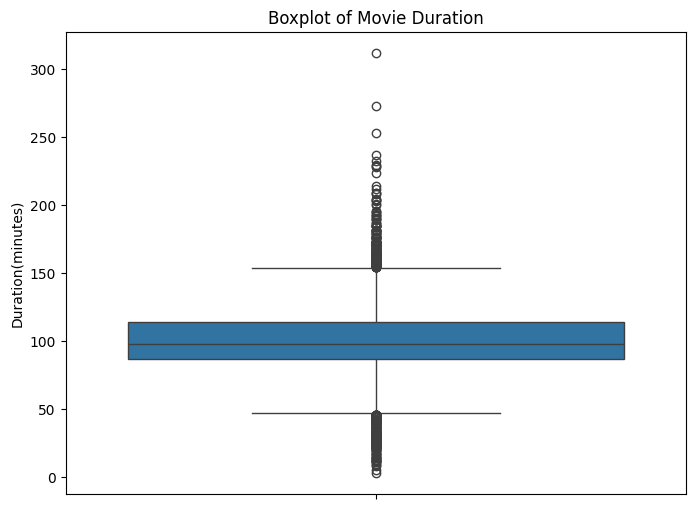

,count
Movie_duration,
90.0,152
97.0,146
94.0,146
93.0,146
91.0,144
...,...
228.0,1
18.0,1
205.0,1


In [39]:
netflix_movies=df[df['type']=='Movie'].copy()
netflix_movies['Movie_duration']=pd.to_numeric(netflix_movies['duration'].str.extract(r'(\d+)')[0])

plt.figure(figsize=(8,6))
sns.boxplot(data=netflix_movies['Movie_duration'])
plt.title('Boxplot of Movie Duration')
plt.ylabel('Duration(minutes)')
plt.show()
netflix_movies['Movie_duration'].value_counts(ascending=False)

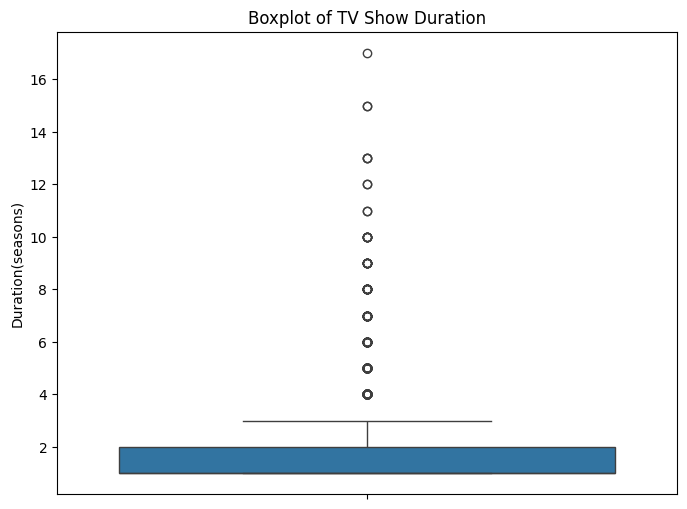

,count
No_of_seasons,
1,1793
2,425
3,199
4,95
5,65
6,33
7,23
8,17
9,9


In [40]:
netflix_tvshows=df[df['type']=='TV Show'].copy()
netflix_tvshows['No_of_seasons']=pd.to_numeric(netflix_tvshows['duration'].str.extract(r'(\d+)')[0])

plt.figure(figsize=(8,6))
sns.boxplot(data=netflix_tvshows['No_of_seasons'])
plt.title('Boxplot of TV Show Duration')
plt.ylabel('Duration(seasons)')
plt.show()
netflix_tvshows['No_of_seasons'].value_counts(ascending=False)

In [41]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,Movie_duration,No_of_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",['Documentaries'],90.0,0.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","['International TV Shows', 'TV Dramas', 'TV My...",0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"['Crime TV Shows', 'International TV Shows', '...",0.0,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","['Docuseries', 'Reality TV']",0.0,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"['International TV Shows', 'Romantic TV Shows'...",0.0,2.0


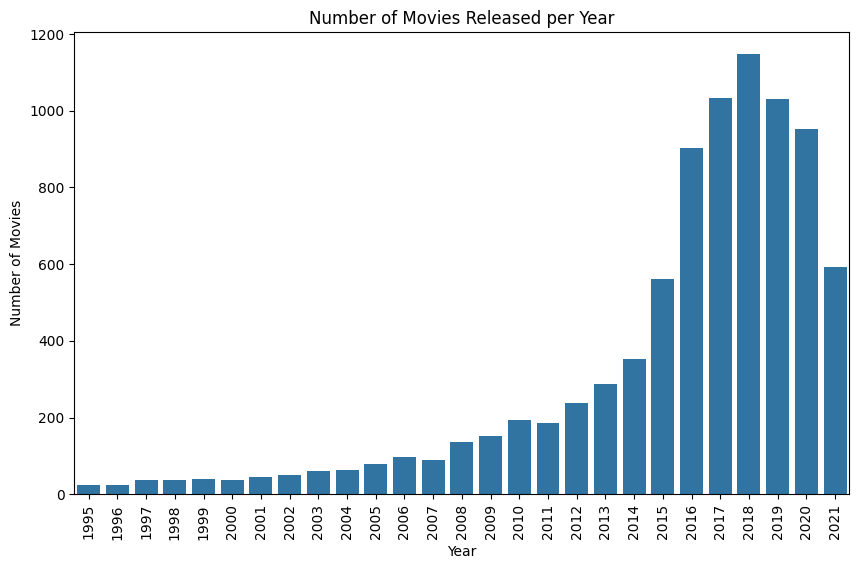

,count
release_year,
2021,592
2020,953
2019,1030
2018,1147
2017,1032
2016,902
2015,560
2014,352
2013,288


In [42]:
#How has the number of movies released per year changed over the last 20-30 years?
release_trend= df['release_year'].value_counts().sort_index(ascending=False)
release_trend=release_trend[release_trend.index>=1995]
plt.figure(figsize=(10,6))
sns.barplot(x=release_trend.index,y=release_trend.values)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()
release_trend



From the above graph we can infer that:-


1.2005 - 2015:
A sharp increase, especially with digital distribution like YouTube and Netflix starts acquiring older films too.

2.2016 - 2019:
Peak growth period. Netflix begin massive original content production.
Years like 2018 (1147 movies) and 2019 (1030), showing very high numbers.

3.2020 - 2021:
A dip due to COVID-19, where netflix production slowed down globally (2021: only 592 vs. 1147 in 2018).


In [ ]:
#Comparison of tv shows vs. movies.?
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


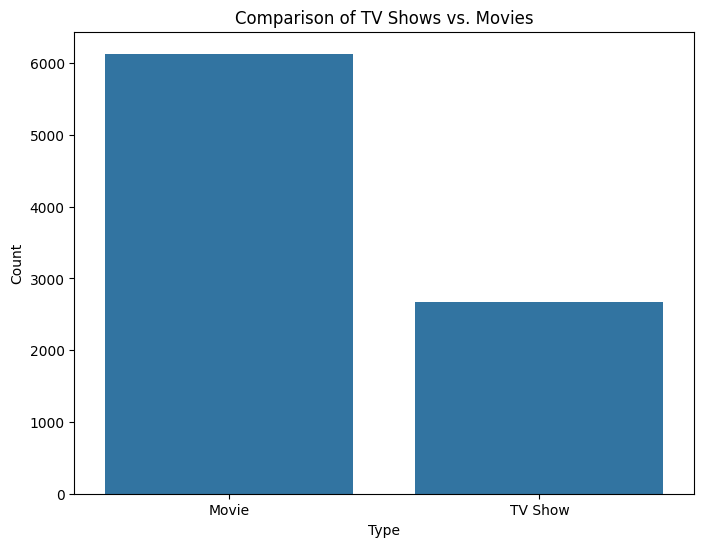

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='type')
plt.title('Comparison of TV Shows vs. Movies')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()



*   We can infer that no.of movies produced on overall is more than the TV Shows



/tmp/ipython-input-44-1117171494.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_trend = df_filtered.groupby(['release_year', 'type']).size().reset_index(name='count')


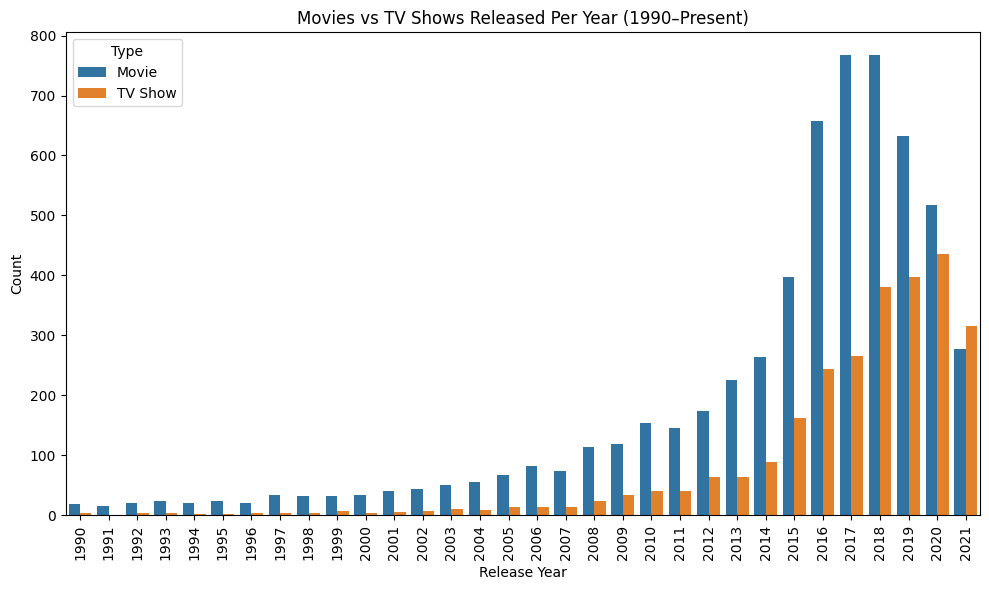

In [44]:
df_filtered = df[df['release_year'] >= 1990]
type_trend = df_filtered.groupby(['release_year', 'type']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=type_trend, x='release_year', y='count', hue='type')
plt.title('Movies vs TV Shows Released Per Year (1990–Present)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


**TV-Shows**
*   In early years like 1990-2000, very few TV Shows were released (often single-digit counts).
*  From 2015 onwards, there's a sharp increase in the number of TV Shows in netflix reaching 397 in 2019 and 436 in 2020.
* This shows Netflix's strong pivot into original and international series.

**Movies**
*  Movies were more common even in the 1990s.
*  There is a steady increase in movie releases, peaking around 2018-2020 (e.g., 517 movies in 2020).

**Movies Vs TV-Shows**
* In 2020: Movies = 517, TV Shows = 436
* In 2021: Movies = 277, TV Shows = 315
* This shows a shift in focus or consumption trends, possibly due to the popularity of binge-worthy content and mini-series.




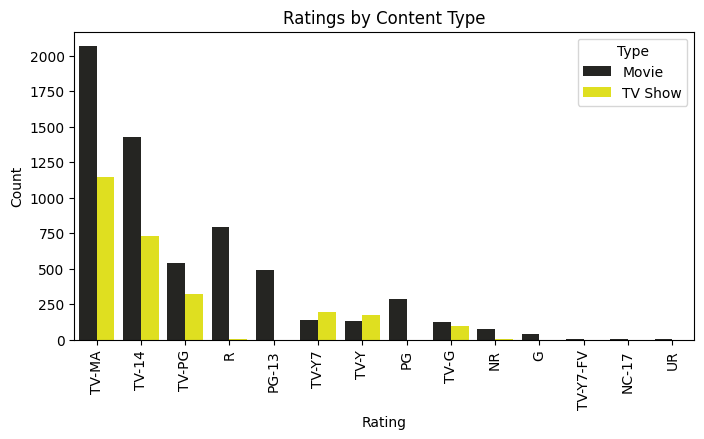

In [45]:
#TV-Show Vs Movies based on rating
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='rating', hue='type',order=df['rating'].value_counts().index,palette='dark:yellow')
plt.title("Ratings by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Type')
21
plt.show()



* TV-MA is the most frequent rating across both movies and TV shows.
* TV shows tend to dominate categories like TV-Y, TV-Y7 and TV-G, reflecting more family or children-oriented programming.




In [46]:
#What is the best time to launch a TV show?
df['date_added'] = df['date_added'].astype(str).str.lstrip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date']=df['date_added'].dt.day
df['date'].value_counts(ascending=False)

,count
date,
1,2222
15,687
2,325
16,289
31,274
20,249
19,243
5,231
22,230


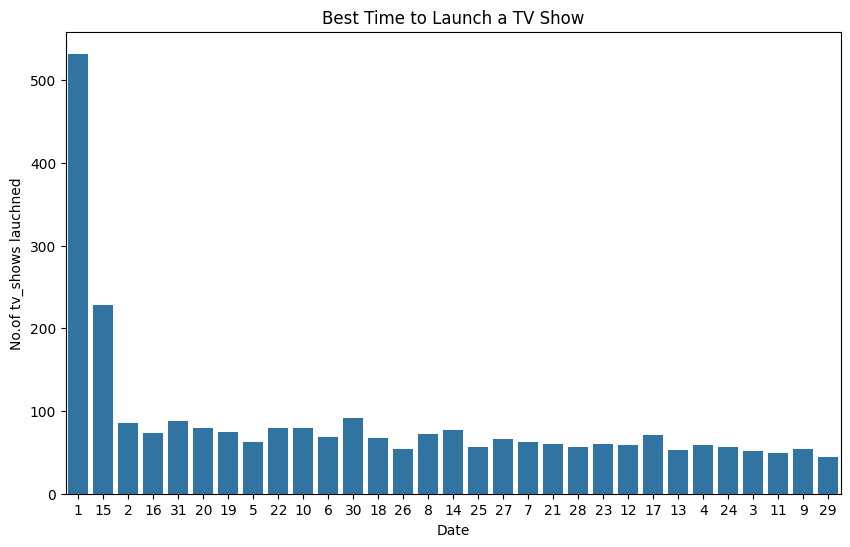

In [47]:
netflix_date_tv_show=df[df['type']=='TV Show']['date'].value_counts(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=netflix_date_tv_show.index,y=netflix_date_tv_show.values,order=df['date'].value_counts(ascending=False).index)
plt.title('Best Time to Launch a TV Show')
plt.xlabel('Date')
plt.ylabel('No.of tv_shows lauchned')
plt.show()



*   1st date of ever month has 532 shows, far above any other day almost double the next common day(15th-228) — this is a massive spike. This suggests a strong industry trend to launch tv shows at the beginning of a month.
*  With 228 launches, the 15th stands out as a mid-month release spike.
* This could reflect a bi-monthly release strategy: start of month + middle of month drops
* Days 30 (91) and 31 (88) are relatively popular. It may reflect last-minute content additions or end-of-cycle releases. These dates also indicate a possible platform reset rhythm: release before the next month starts.
*  Days like 2, 10, 14, 16, 20, 22 fall into this range. These are solid "backup" options if the 1st is too crowded and you're avoiding the extremes.




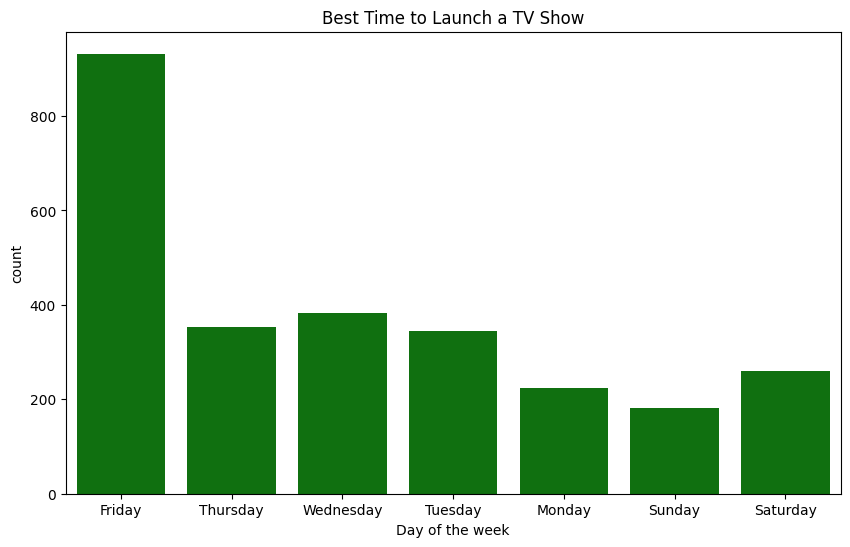

In [48]:
df['day_name']=df['date_added'].dt.day_name()
df['day_name'].value_counts()
df[df['type']=='TV Show']['day_name'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['type']=='TV Show'],x='day_name',color='green')
plt.title('Best Time to Launch a TV Show')
plt.xlabel('Day of the week')
plt.show()

Analysis of actors/directors of different types of shows/movies?

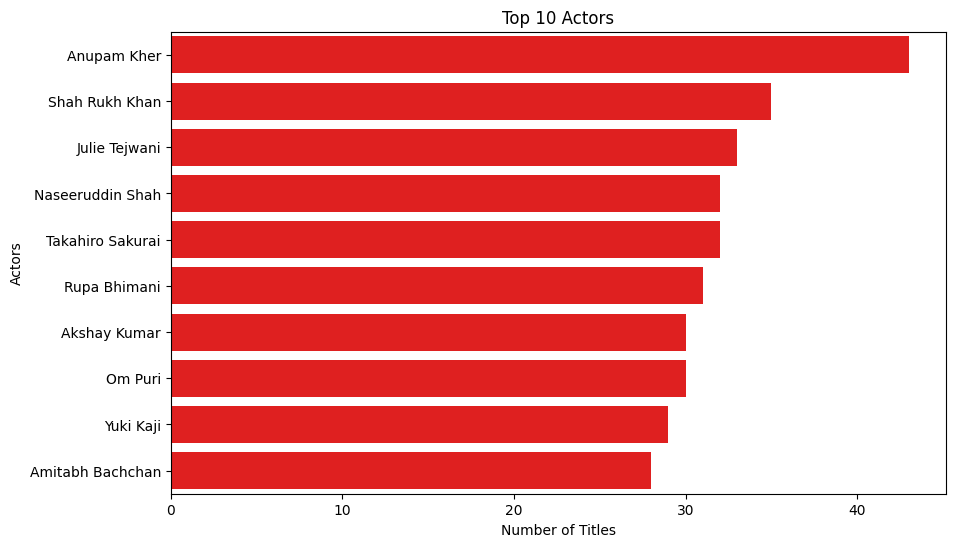

,cast,unq title count
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28


In [49]:
#analysis of top 10 actors
cast_unnested=df.copy()
cast_unnested['cast']=cast_unnested['cast'].str.split(', ')
cast_unnested=cast_unnested.explode('cast')
cast_unnested=cast_unnested[cast_unnested['cast']!="Unknown"]
top_actors=(cast_unnested.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10).reset_index(name='unq title count'))
plt.figure(figsize=(10,6))
sns.barplot(data=top_actors,y='cast',x='unq title count',color='red')
plt.title('Top 10 Actors')
plt.ylabel('Actors')
plt.xlabel('Number of Titles')
plt.show()

top_actors

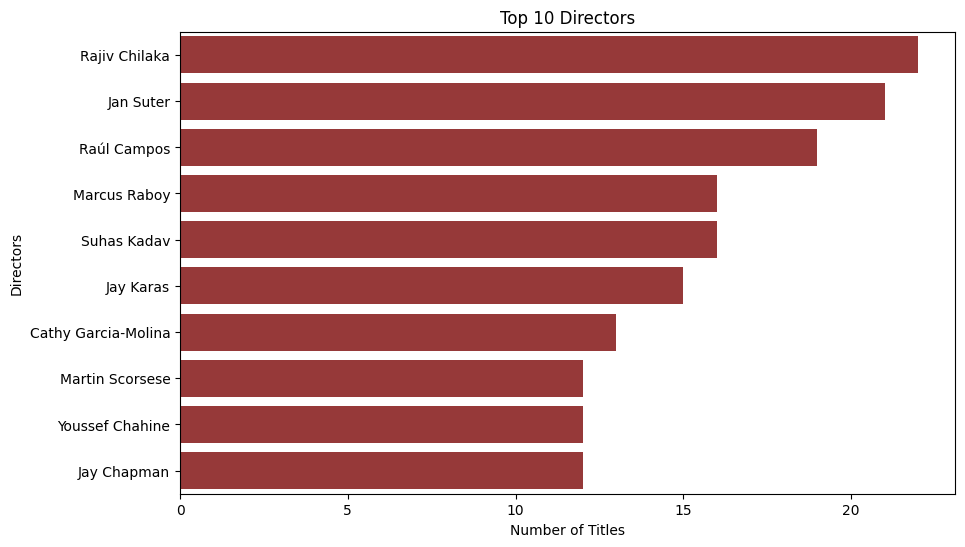

,director,unq title count
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Martin Scorsese,12
8,Youssef Chahine,12
9,Jay Chapman,12


In [50]:
#analysis of top 10 directors
director_unnested=df.copy()
director_unnested['director']=director_unnested['director'].str.split(', ')
director_unnested=director_unnested.explode('director')
director_unnested=director_unnested[director_unnested['director']!="Unknown"]
top_directors=(director_unnested.groupby('director')['title'].nunique().sort_values(ascending=False).head(10).reset_index(name='unq title count'))
plt.figure(figsize=(10,6))
sns.barplot(data=top_directors,y='director',x='unq title count',color='brown')
plt.title('Top 10 Directors')
plt.ylabel('Directors')
plt.xlabel('Number of Titles')
plt.show()
top_directors


*  Top director  according to unique title is Rajiv chilaka with 22 titles
*  Top actor according to unique titles is Anupam kher with 43 title




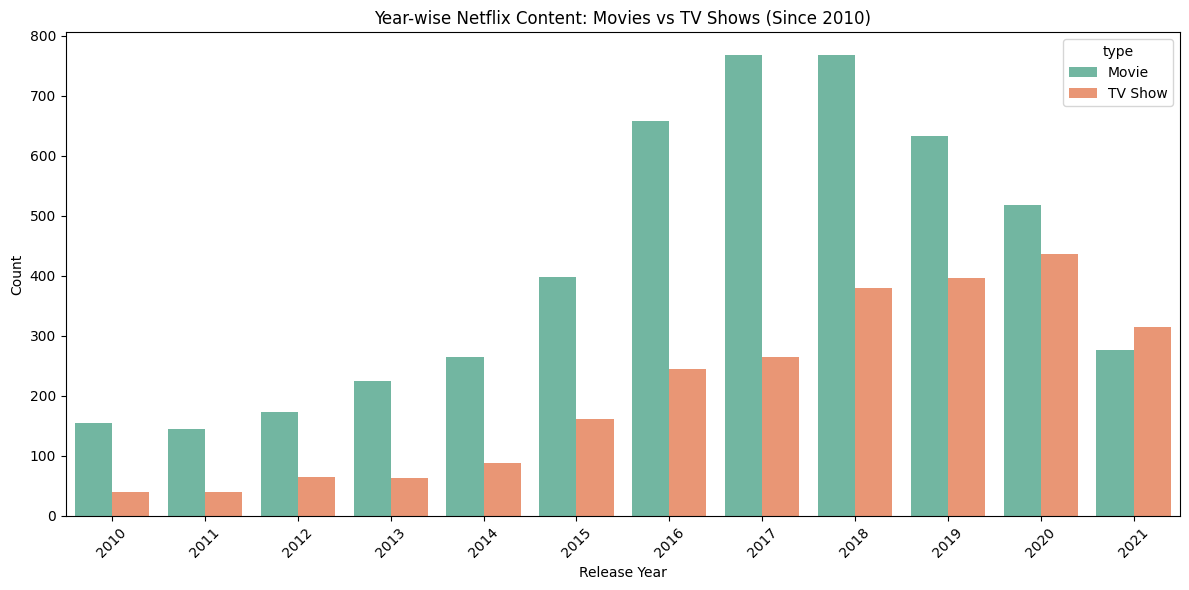

In [51]:
#Does Netflix has more focus on TV Shows than movies in recent years?
recent_trend= df['release_year'].value_counts().sort_index(ascending=False)
recent_trend=release_trend[release_trend.index>=2010]
recent=df[df['release_year']>=2010]
plt.figure(figsize=(12,6))
sns.countplot(data=recent, x='release_year', hue='type', palette='Set2')
plt.title('Year-wise Netflix Content: Movies vs TV Shows (Since 2010)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Movies Vs TV-Shows**
* In 2020: Movies = 517, TV Shows = 436
* In 2021: Movies = 277, TV Shows = 315
* This shows a shift in focus or consumption trends, possibly due to the popularity of binge-worthy content and mini-series.

/tmp/ipython-input-52-560323196.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_breakdown = (filtered_data.groupby(['country', 'type']).size().reset_index(name='Count').sort_values(['country', 'Count'], ascending=[False, False]))


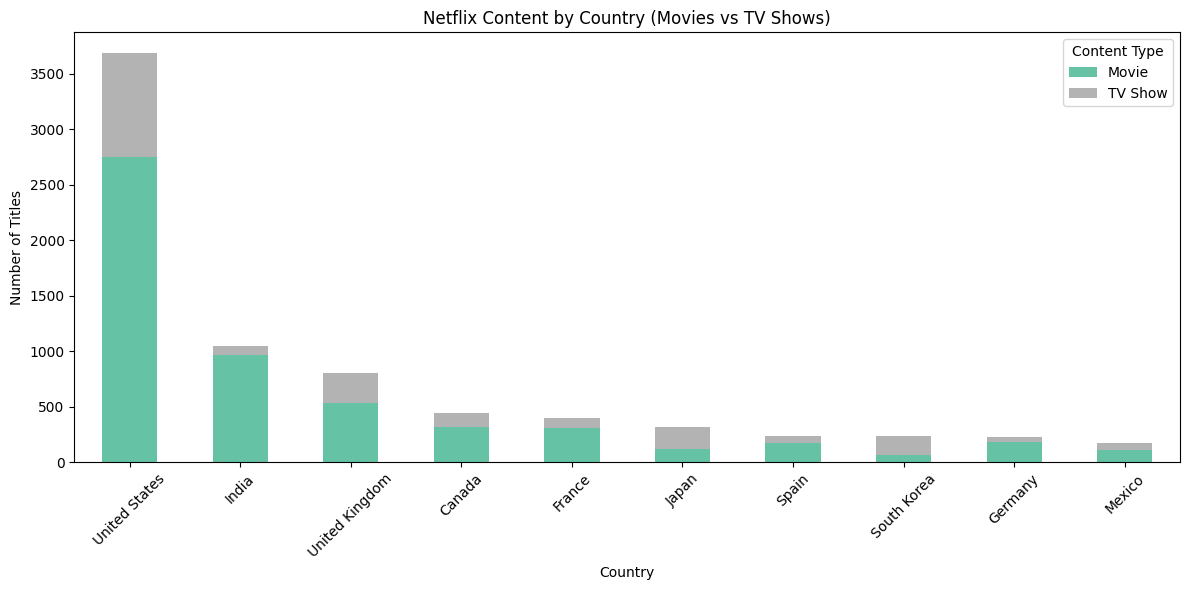

type,Movie,TV Show,Total
country,,,
United States,2751,938,3689
India,962,84,1046
United Kingdom,532,272,804
Canada,319,126,445
France,303,90,393
Japan,119,199,318
Spain,171,61,232
South Korea,61,170,231
Germany,182,44,226


In [52]:
#Understanding what content is available in different countries
country_unnested=df.copy()
country_unnested['country']=country_unnested['country'].str.split(', ')
country_unnested=country_unnested.explode('country')
country_unnested=country_unnested[country_unnested['country']!='Unknown']
top_countries=(country_unnested.groupby('country').size().sort_values(ascending=False).head(10).reset_index(name='top 10 countries'))
top_country_list = top_countries['country'].tolist()
filtered_data = country_unnested[country_unnested['country'].isin(top_country_list)]
type_breakdown = (filtered_data.groupby(['country', 'type']).size().reset_index(name='Count').sort_values(['country', 'Count'], ascending=[False, False]))
pivot_df = type_breakdown.pivot(index='country', columns='type', values='Count')

pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('Total', ascending=False)
pivot_df.drop('Total', axis=1, inplace=True)

pivot_df.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title('Netflix Content by Country (Movies vs TV Shows)')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()
pivot_df['Total']=pivot_df.sum(axis=1)
pivot_df.sort_values('Total',ascending=False)
pivot_df

**# Inference:-**

*  With 3689 total of movies and TV-shows, the US leads by a huge margin.
*  About 25% of US content is TV Shows, the rest are Movies.
*  Indicates Netflix's US content strategy still leans heavily toward Movies, but with a significant TV investment too.
*  India has 962 Movies and only 84 TV Shows → 92% of content is of Movies in netflix.
*  Reflects India's strong film industry focus and lesser emphasis on original series.
* UK has a fairly balanced split (TV: ~34%).Strong legacy in both TV (e.g. BBC productions) and film


/tmp/ipython-input-53-2034216433.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tv_percent.index, y=tv_percent['TV Show %'], palette='coolwarm',)


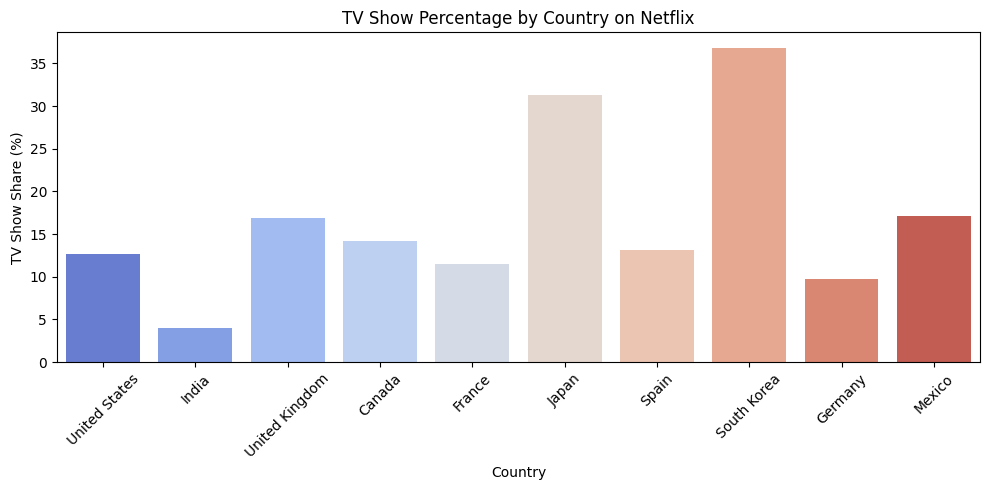

type,Movie,TV Show,Total,TV Show %
country,,,,
South Korea,61,170,462,36.80
Japan,119,199,636,31.29
Mexico,111,58,338,17.16
United Kingdom,532,272,1608,16.92
Canada,319,126,890,14.16
Spain,171,61,464,13.15
United States,2751,938,7378,12.71
France,303,90,786,11.45
Germany,182,44,452,9.73


In [53]:
# Calculate TV % and sort
tv_percent = pivot_df.copy()
tv_percent['Total'] = tv_percent.sum(axis=1)
tv_percent['TV Show %'] = (tv_percent['TV Show'] / tv_percent['Total']) * 100

plt.figure(figsize=(10,5))
sns.barplot(x=tv_percent.index, y=tv_percent['TV Show %'], palette='coolwarm',)
plt.title('TV Show Percentage by Country on Netflix')
plt.ylabel('TV Show Share (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
tv_percent.sort_values('TV Show %', ascending=False).round(2)

# **Inference**
 * South Korea: 73.6% TV Shows & Japan: 62.6% TV Shows
 * **This confirms global trends — K-dramas and Japanese anime are big streaming draws and Netflix is investing accordingly.**

/tmp/ipython-input-54-879761234.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=movie_percent.index, y=movie_percent['movie %'], palette='magma')


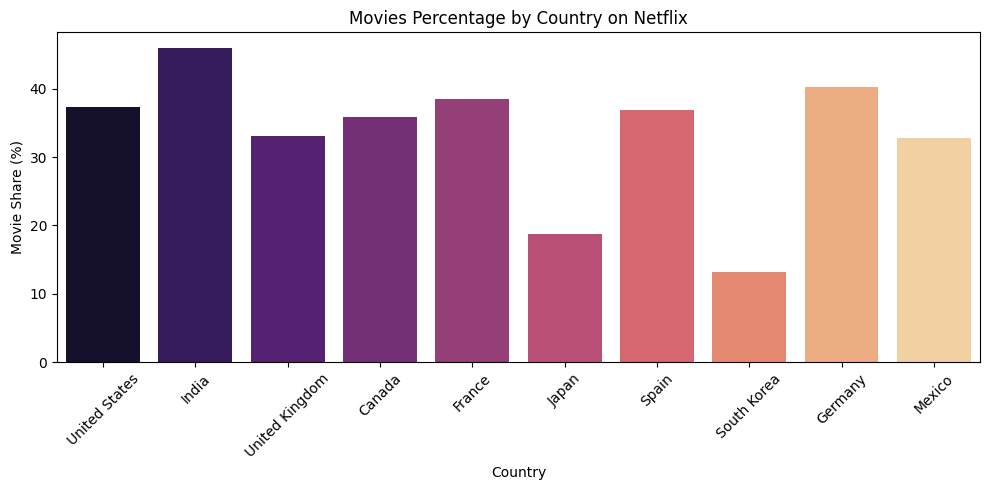

type,Movie,TV Show,Total,movie %
country,,,,
India,962,84,2092,45.98
Germany,182,44,452,40.27
France,303,90,786,38.55
United States,2751,938,7378,37.29
Spain,171,61,464,36.85
Canada,319,126,890,35.84
United Kingdom,532,272,1608,33.08
Mexico,111,58,338,32.84
Japan,119,199,636,18.71


In [54]:
# Calculate TV % and sort
movie_percent = pivot_df.copy()
movie_percent['Total'] = movie_percent.sum(axis=1)
movie_percent['movie %'] = (movie_percent['Movie'] / movie_percent['Total']) * 100

plt.figure(figsize=(10,5))
sns.barplot(x=movie_percent.index, y=movie_percent['movie %'], palette='magma')
plt.title('Movies Percentage by Country on Netflix')
plt.ylabel('Movie Share (%)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
movie_percent.sort_values('movie %', ascending=False).round(2)

**#Inference**
 * India stands out with nearly 92% movies — clearly Netflix sources/produces primarily films in India.
 * Germany, France, US, and Spain also show a strong tilt toward movies.

# **#Business Insights**

#1.Best time to launch a TV-Show(Day of Month):-
  * Highest launches occurred on the 1st (532 titles) and 15th (228 titles) of the month.
  * Netflix prefers launching content at the start (1st) and mid (15th) of the month — possibly aligning with subscriber billing cycles or monthly engagement strategies.
  * These dates may see higher viewership peaks, making them ideal for high-budget or anticipated shows.

#2.Best time to launch a TV-Show(Day of week):-
  * Friday (932 shows) is the most common release day, followed by Wednesday and Thursday.
  * Friday is the prime launch day, aligning with weekend viewing behavior.
  * Releasing before the weekend ensures maximum binge potential.
  * This shows Netflix strategically times releases to increase initial watch hours and engagement.
  
#3.TV Shows vs. Movies Trend (2010 - Present):-
  * While Netflix still produces more movies, there's a significant and growing investment in serial content, aligning with binge consumption behavior.
  * TV Shows help retain users longer on the platform due to episodic format.

#4.Content by country (Top 10):-
  * The U.S. remains Netflix's content hub.
  * India has a massive content volume, largely driven by regional films.
  * The UK follows with significant investment in both movies and series.

#5.Country wise content type breakdown:-
  * India is highly movie-focused — Netflix tailors content strategy here to cater to Bollywood and regional cinema lovers.
  * South Korea and Japan have a TV Show-heavy content mix — Netflix likely leverages K-Dramas and Anime, which are globally popular exports.
  * This suggests Netflix localizes its content mix based on country-specific viewer preferences.

#6.Movie Duration:-
  * The most frequent movie lengths fall in the 90-100 minute range.
  * Netflix likely favors this range because it aligns with ,Viewer attention span, Evening viewing time and Global industry standards for films

#7.Movies release per year over last 20-30 years:-
  * 2010-2018 which was platform building phase, focused on acquisition and user base growth.
  * 2019-2021 release dopped by ~43% possible reasons would be:-
    1. covid-19 production delays.
    2. Shift in strategy from quantity to quality.
    3. Rising investment in TV-Shows and series.
  * Stabilising Production Pipeline which means 2021's 592 releases reflect substantial content flow.
  * Also, netflix seems balancing between:-
    1. Originals Vs Licensed content.
    2. Global Vs Localised content.
    3. Movies Vs Series.


# **#Recommendations**

# 1.Content launch Strategy:-
  * Prioritize releasing top shows/movies on the 1st and 15th of each month — these dates already show high activity, suggesting audience attention is higher.
  * Reinforce content marketing around those dates to maximize impact and drive binge behavior.
  * Continue leveraging Fridays for new releases.
  * Thursday evening teasers or early drops can build pre-weekend momentum.
# 2.Regional content investment:-
  **For India**
  * Focus on producing and acquiring more regional-language movies.
  * Add light episodic content (limited series or miniseries) to test waters for TV consumption.
  * Collaborate with local production houses for exclusive rights.
  **For South Korea & Japan**
  * Maintain or increase investment in TV shows, especially K-Dramas and Anime.* Consider bundling episodes or early-access options for popular series.
  * Promote to international audiences with dubbing/subtitle strategies.
  **US & UK**
  * These regions have a balanced mix — maintain this and explore genre-specific trends (e.g. crime dramas, documentaries).
  * Encourage co-productions to tap both English-speaking and global markets.
# 3.Content Format recommendations:-
  * Since TV shows help retain users longer, increase TV show production for regions with lower show share (e.g. India, France).
  * Use miniseries or limited series to test genre preferences without full commitment.
  * Movies serve as gateway content — optimize global movie titles for homepage visibility.
  * Continue using movies as a hook for new subscribers, especially in mobile-first markets like India.
#4.Product & UX Improvements:-
  * Surface TV-heavy content in South Korea, Japan, and movie-heavy content in India and Germany.
  * Use day-parting strategies to show newly launched content prominently on Fridays/weekends.
#5.Marketing and engagment:-
  * Promote a “New on the 1st” or “Weekend Drops” campaign to ride the natural spike in content releases.
  * Engage users with reminder features or countdowns for Friday releases.
  **Leveraging Global Strengths**
  * Promote K-Dramas in India and the US, Anime in Latin America, and Bollywood movies globally — build cross-regional interest.
#6.Movie Duration:-
  * For in-house productions or acquired content, target 90 -100 minutes as the sweet spot for movie length.
  * This range ensures high watch completion rates, crucial for Netflix's recommendation engine and engagement metrics.
  * For longer range movies like 150+ minutes,consider splitting like long format sotries (>2.5 hours) into episodic or limited series format to maximise engagment
#7.Movie release years:-
  * Schedule movie releases to fill content between major TV drops.
  * Regularly monitor engagement metrics to decide whether to increase volume
  * Build a flexible, pandemic-resilient production plan for future disruptions

